In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
  
%matplotlib inline

In [2]:
df=pd.read_csv('fatal-police-shootings-data.csv')
df.shape

(5416, 14)

In [3]:
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5189 non-null   object 
 5   age                      5181 non-null   float64
 6   gender                   5414 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null   bool   
 11  threat_level             5416 non-null   object 
 12  flee                     5167 non-null   object 
 13  body_camera              5416 non-null   bool   
dtypes: bool(2), float64(1), 

In [5]:
df.describe()

,id,age
count,5416.000000,5181.000000
mean,3010.398264,37.117931
std,1695.786456,13.116135
min,3.000000,6.000000
25%,1545.750000,27.000000
50%,3009.500000,35.000000
75%,4486.250000,46.000000
max,5927.000000,91.000000


In [6]:
df.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                      227
age                        235
gender                       2
race                       521
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       249
body_camera                  0
dtype: int64

In [7]:
df.columns.values

array(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'], dtype=object)

In [8]:
print(df.isnull().sum())
if(any(list(df.isnull().sum())) !=0):
    print("--------------------------")
    print("We have null values")
else:
    print("--------------------------")
    print("We don't have null values")

id                           0
name                         0
date                         0
manner_of_death              0
armed                      227
age                        235
gender                       2
race                       521
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       249
body_camera                  0
dtype: int64
--------------------------
We have null values


In [9]:
import seaborn as sns
from matplotlib import gridspec
import matplotlib.cm as cm

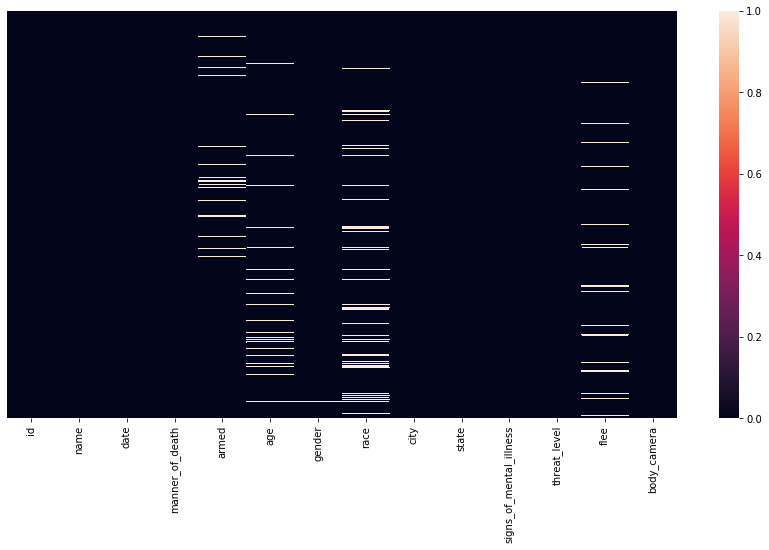

In [10]:
fig, ax = plt.subplots(figsize=(15,7.5))   
sns.heatmap(df.isnull(),yticklabels=False, ax=ax)

In [11]:
df.groupby("race").count()

,id,name,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,flee,body_camera
race,,,,,,,,,,,,,
A,93,93,93,93,90,91,93,93,93,93,93,88,93
B,1298,1298,1298,1298,1234,1274,1298,1298,1298,1298,1298,1248,1298
H,902,902,902,902,857,878,902,902,902,902,902,852,902
N,78,78,78,78,75,77,78,78,78,78,78,73,78
O,48,48,48,48,45,47,48,48,48,48,48,47,48
W,2476,2476,2476,2476,2377,2443,2475,2476,2476,2476,2476,2380,2476


In [12]:
df.replace(to_replace = ['A'], value = ['Asian'], inplace = True)
df.replace(to_replace = ['B'], value = ['Black Non-Hispanic'], inplace = True)
df.replace(to_replace = ['H'], value = ['Hispanic'], inplace = True)
df.replace(to_replace = ['N'], value = ['Native American'], inplace = True)
df.replace(to_replace = ['O'], value = ['Other'], inplace = True)
df.replace(to_replace = ['W'], value = ['White Non-Hispanic'], inplace = True)

In [13]:
df.groupby("gender").count()

,id,name,date,manner_of_death,armed,age,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
gender,,,,,,,,,,,,,
F,238,238,238,238,222,229,222,238,238,238,238,229,238
M,5176,5176,5176,5176,4965,4951,4672,5176,5176,5176,5176,4936,5176


In [14]:
df.groupby("body_camera").count()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee
body_camera,,,,,,,,,,,,,
False,4798,4798,4798,4798,4591,4579,4796,4317,4798,4798,4798,4798,4573
True,618,618,618,618,598,602,618,578,618,618,618,618,594


In [15]:
df["armed"].value_counts()

gun                   3060
knife                  792
unarmed                353
toy weapon             186
undetermined           164
                      ... 
grenade                  1
walking stick            1
tire iron                1
wrench                   1
BB gun and vehicle       1
Name: armed, Length: 93, dtype: int64

In [16]:
df["threat_level"].value_counts()

attack          3495
other           1682
undetermined     239
Name: threat_level, dtype: int64

In [17]:
df['manner_of_death'].value_counts()

shot                5146
shot and Tasered     270
Name: manner_of_death, dtype: int64

In [18]:
df['flee'].value_counts()

Not fleeing    3411
Car             900
Foot            692
Other           164
Name: flee, dtype: int64

In [19]:
df['age'].value_counts()

31.0    186
25.0    183
33.0    171
27.0    171
29.0    169
       ... 
89.0      1
12.0      1
78.0      1
13.0      1
79.0      1
Name: age, Length: 77, dtype: int64

In [20]:
df['signs_of_mental_illness'].value_counts()

False    4200
True     1216
Name: signs_of_mental_illness, dtype: int64

In [21]:
df['date'].value_counts()

2018-04-01    9
2018-02-01    9
2020-05-26    9
2018-01-06    9
2019-01-28    9
             ..
2018-01-09    1
2018-04-15    1
2017-04-23    1
2018-01-13    1
2015-11-27    1
Name: date, Length: 1844, dtype: int64

In [22]:
df['date'] = df['date'].apply(str)
df[['Year','Month','Day']] = df.date.apply(   lambda x: pd.Series(str(x).split("-")))
df.drop(['Month','Day','date'],axis = 'columns',inplace = True)
df['Year'] = df['Year'].apply(int)

In [23]:
df.head()

,id,name,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Year
0,3,Tim Elliot,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,2015
1,4,Lewis Lee Lembke,shot,gun,47.0,M,White Non-Hispanic,Aloha,OR,False,attack,Not fleeing,False,2015
2,5,John Paul Quintero,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,2015
3,8,Matthew Hoffman,shot,toy weapon,32.0,M,White Non-Hispanic,San Francisco,CA,True,attack,Not fleeing,False,2015
4,9,Michael Rodriguez,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,2015


In [24]:
df['Year'].value_counts()

2019    1002
2015     994
2018     991
2017     986
2016     962
2020     481
Name: Year, dtype: int64

In [25]:
df['city'].value_counts()

Los Angeles    85
Phoenix        78
Houston        57
Las Vegas      45
San Antonio    43
               ..
Romulus         1
Claymont        1
Panama City     1
Welcome         1
Converse        1
Name: city, Length: 2470, dtype: int64

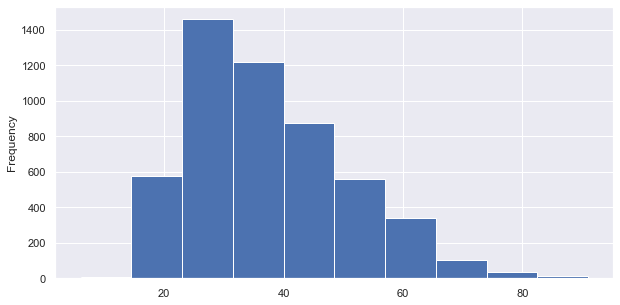

In [26]:
sns.set(rc={'figure.figsize':(10,5)})
df["age"].plot.hist()

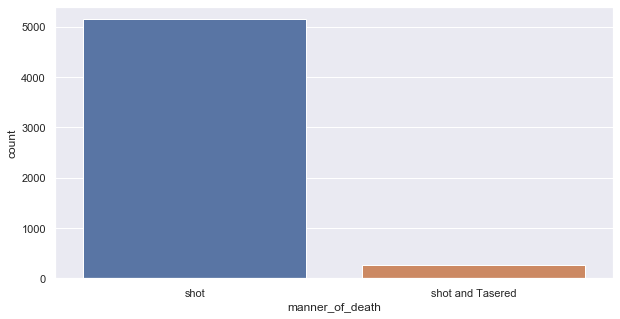

In [27]:
sns.countplot(x = "manner_of_death", data = df)

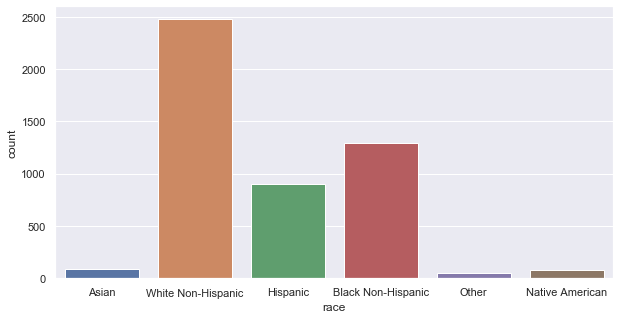

In [28]:
sns.countplot(x = "race", data = df)

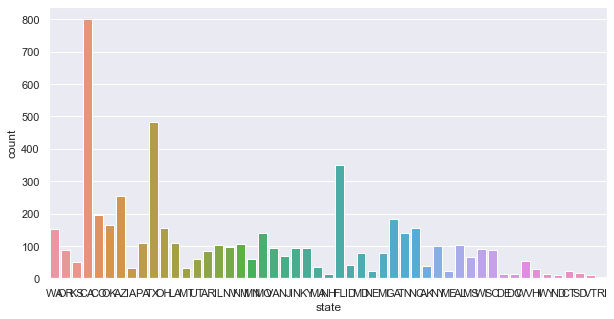

In [29]:
sns.countplot(x = "state", data = df)

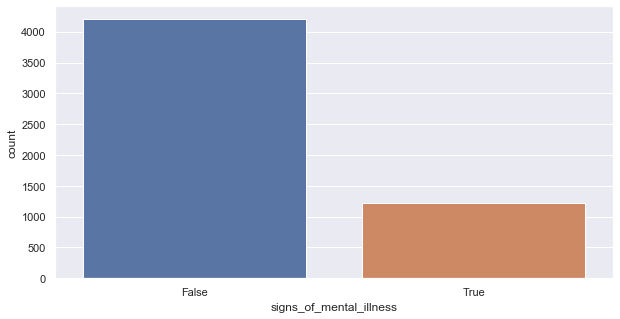

In [30]:
sns.countplot(x = "signs_of_mental_illness", data = df)

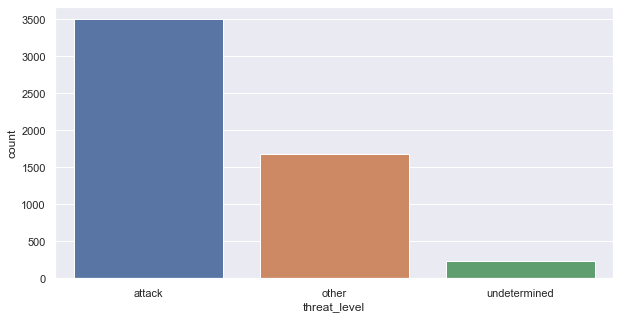

In [31]:
sns.countplot(x = "threat_level", data = df)

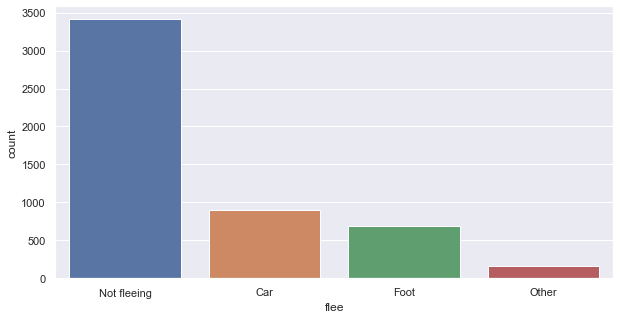

In [32]:
sns.countplot(x = "flee", data = df)

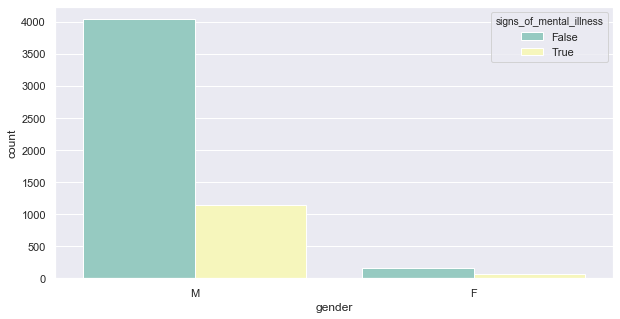

In [33]:
sns.countplot(x = "gender", hue = "signs_of_mental_illness",data = df, palette = 'Set3')

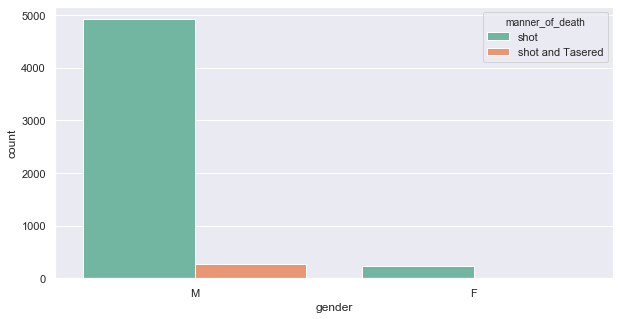

In [34]:
sns.countplot(x = "gender", hue = "manner_of_death",data = df, palette = 'Set2')

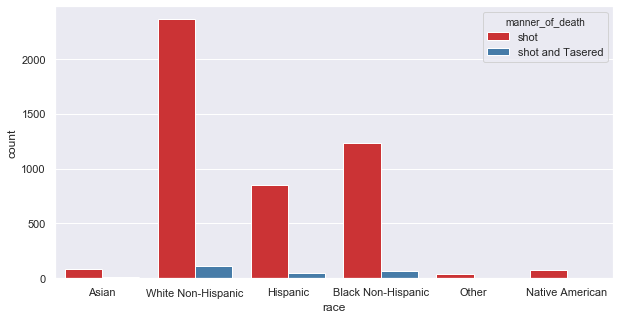

In [35]:
sns.countplot(x = "race", hue = "manner_of_death",data = df, palette = 'Set1')

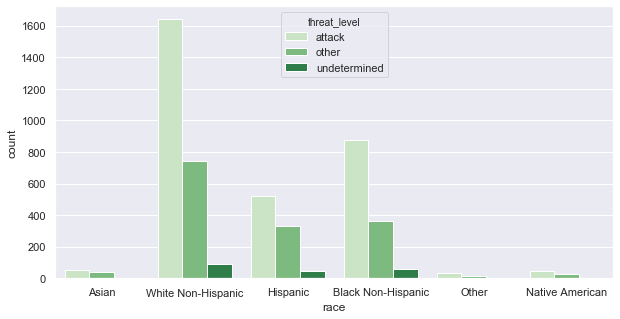

In [36]:
sns.countplot(x = "race", hue = "threat_level",data = df, palette = 'Greens')

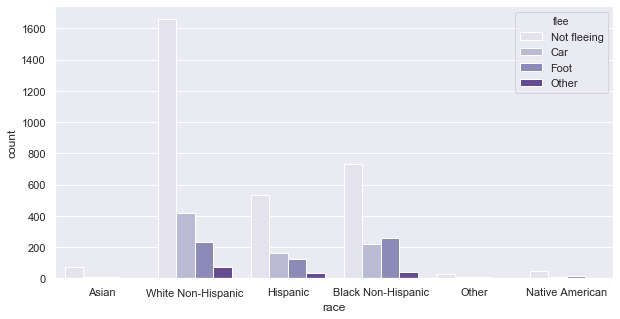

In [37]:
sns.countplot(x = "race", hue = "flee",data = df, palette = 'Purples')

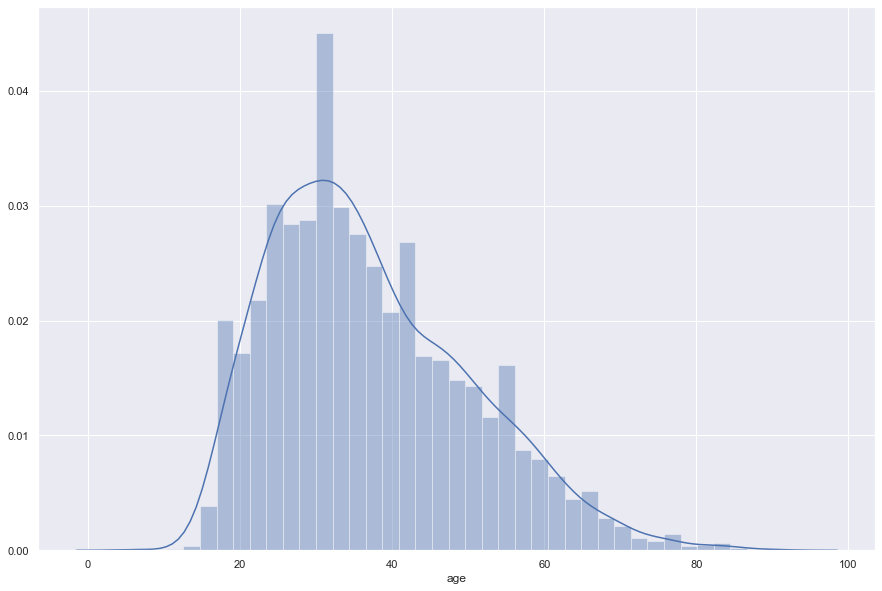

In [38]:
plt.figure(figsize=(15,10))
sns.distplot(df['age'])

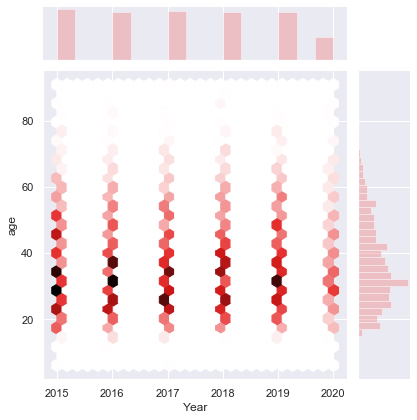

In [39]:
sns.axes_style('whitegrid')
sns.jointplot(x = df['Year'], y =df['age'], kind = 'hex',color = 'lightcoral')

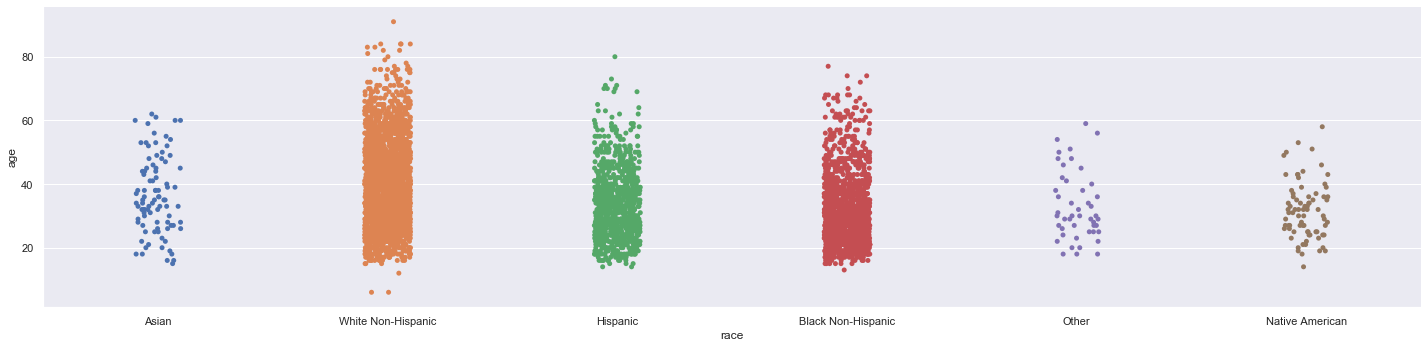

In [40]:
sns.catplot(x = 'race',y='age', kind = 'strip', data = df,aspect = 4)

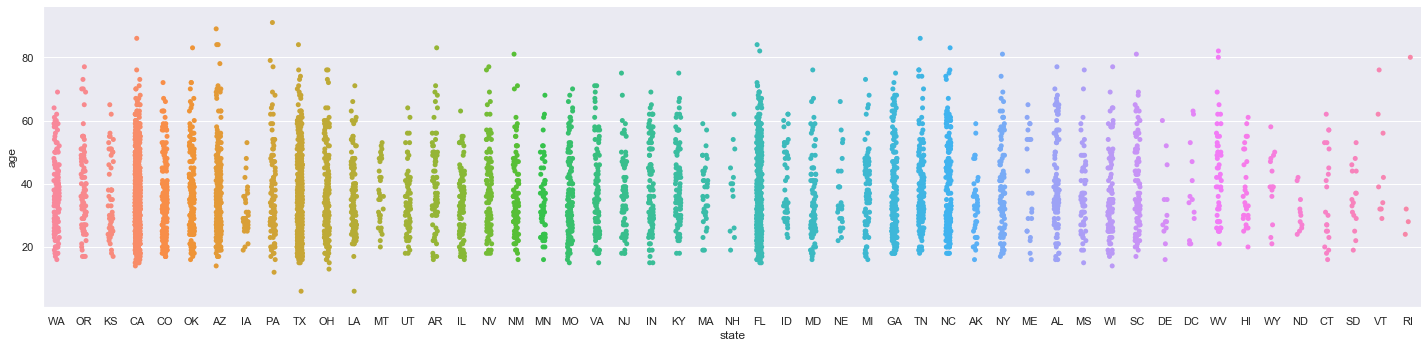

In [41]:
sns.catplot(x = 'state',y='age', kind = 'strip', data = df,aspect = 4)

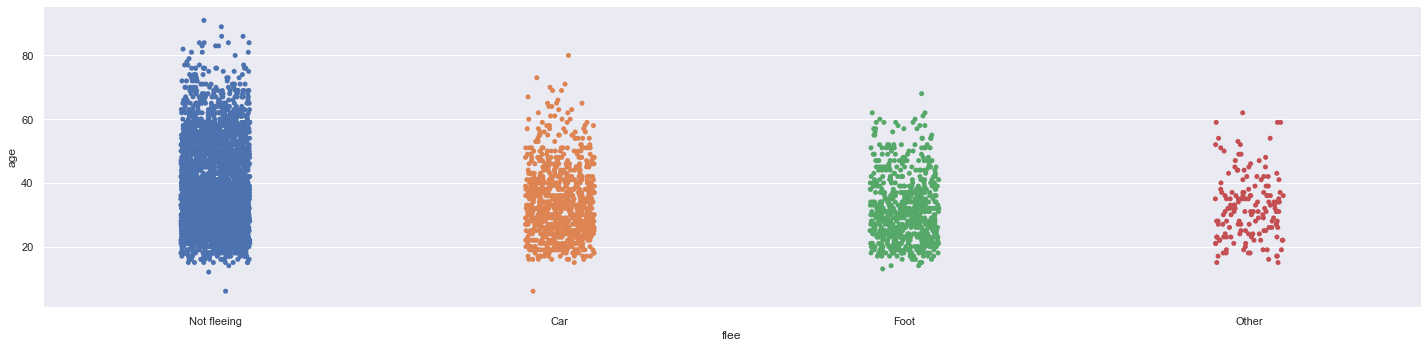

In [42]:
sns.catplot(x = 'flee',y='age', kind = 'strip', data = df,aspect = 4)

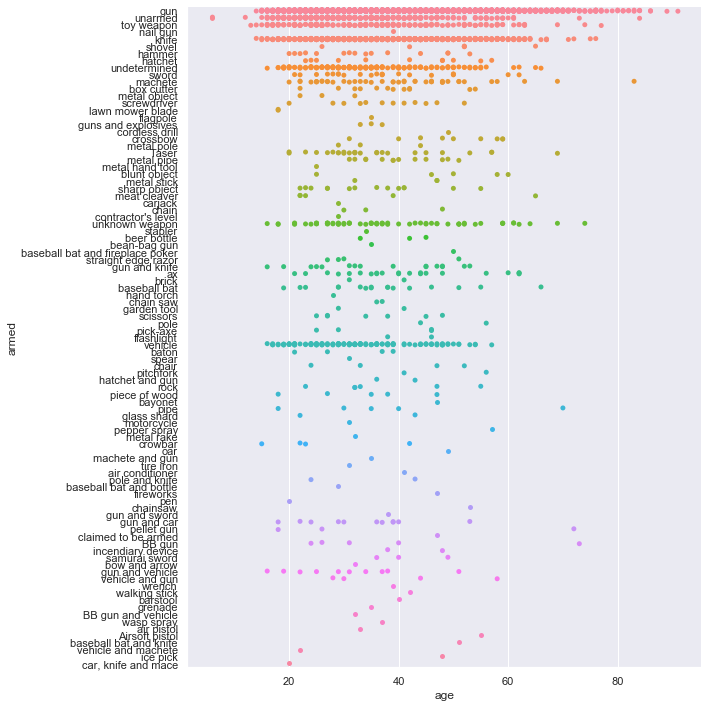

In [43]:
sns.catplot(x = 'age',y='armed', kind = 'strip', data = df,height = 10)

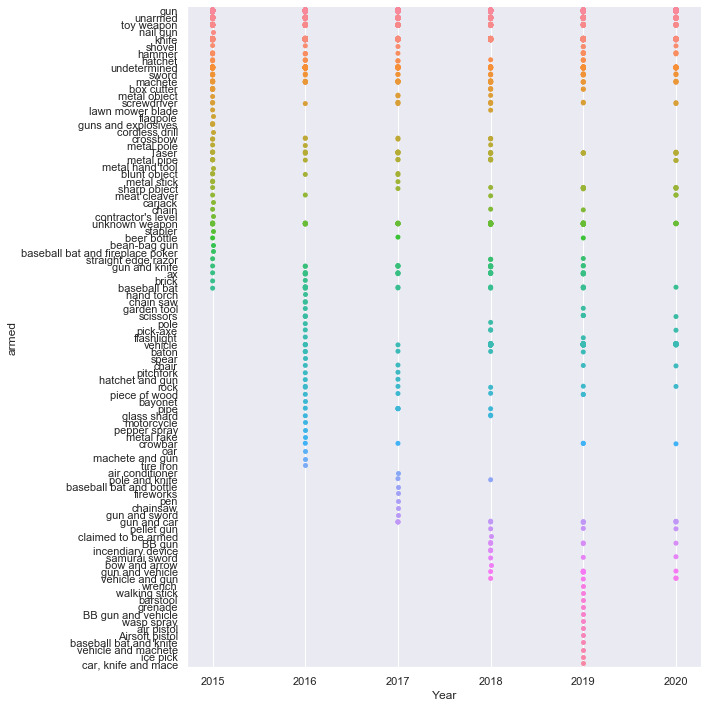

In [44]:
sns.catplot(x = 'Year',y='armed', kind = 'strip', data = df,height = 10)

In [45]:
df.city.unique()
city_crime = df.city.value_counts()
city_high_crime = [(city, city_crime[city]) for city in city_crime.index if city_crime[city] > 30]
city_high_crime

[('Los Angeles', 85),
 ('Phoenix', 78),
 ('Houston', 57),
 ('Las Vegas', 45),
 ('San Antonio', 43),
 ('Chicago', 38),
 ('Columbus', 38),
 ('Albuquerque', 35),
 ('Kansas City', 34),
 ('Jacksonville', 33)]

In [46]:
df.groupby(['threat_level','armed','signs_of_mental_illness']).age.count().unstack(level=2)

signs_of_mental_illness          False  True 
threat_level armed                           
attack       BB gun                3.0    NaN
             BB gun and vehicle    1.0    NaN
             Taser                19.0    2.0
             air pistol            1.0    NaN
             ax                    3.0    3.0
...                                ...    ...
undetermined toy weapon            4.0    NaN
             unarmed              32.0    7.0
             undetermined         78.0    7.0
             unknown weapon        9.0    2.0
             vehicle               1.0    NaN

[150 rows x 2 columns]

<Figure size 720x504 with 0 Axes>

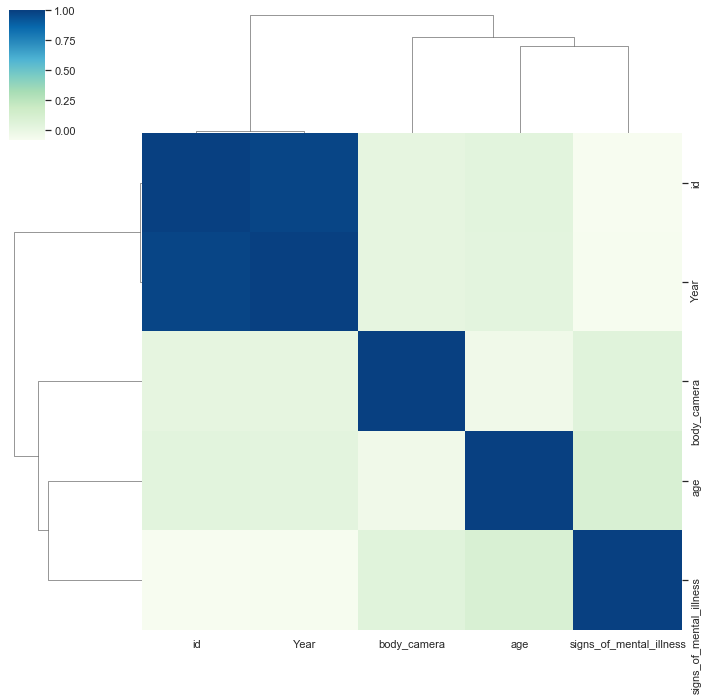

In [47]:
fig = plt.figure(figsize = (10,7))
sns.clustermap(df.corr(),cmap="GnBu")

In [48]:
df.isna().any()

id                         False
name                       False
manner_of_death            False
armed                       True
age                         True
gender                      True
race                        True
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                        True
body_camera                False
Year                       False
dtype: bool

In [49]:
MissingPercentage = (((df.isna().sum())/df.shape[0])*100)
MissingPercentage

id                         0.000000
name                       0.000000
manner_of_death            0.000000
armed                      4.191285
age                        4.338996
gender                     0.036928
race                       9.619645
city                       0.000000
state                      0.000000
signs_of_mental_illness    0.000000
threat_level               0.000000
flee                       4.597489
body_camera                0.000000
Year                       0.000000
dtype: float64

In [50]:
df["race"].fillna("UnKnown", inplace = True)
df.isnull().sum()

id                           0
name                         0
manner_of_death              0
armed                      227
age                        235
gender                       2
race                         0
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       249
body_camera                  0
Year                         0
dtype: int64

In [51]:
df["age"].fillna(df["age"].mean(), inplace = True)
df.isnull().sum()

id                           0
name                         0
manner_of_death              0
armed                      227
age                          0
gender                       2
race                         0
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       249
body_camera                  0
Year                         0
dtype: int64

In [52]:
df =df.dropna(how='any')
df.shape

(4946, 14)

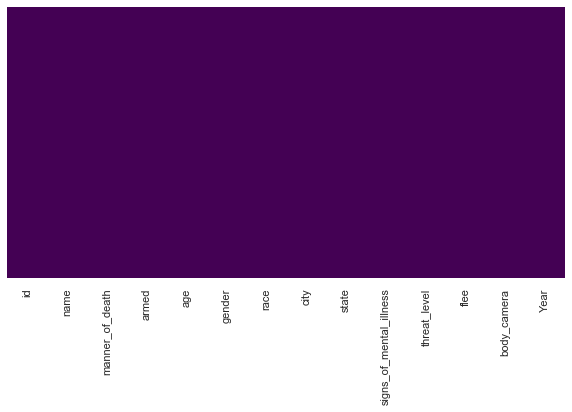

In [53]:
#Verifying null values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [54]:
df.isna().any()

id                         False
name                       False
manner_of_death            False
armed                      False
age                        False
gender                     False
race                       False
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                       False
body_camera                False
Year                       False
dtype: bool

In [55]:
pd.crosstab(df.age, df.body_camera, margins = True).style.background_gradient(cmap='OrRd')

body_camera,False,True,All
age,,,
6.0,1,1,2
12.0,1,0,1
13.0,1,0,1
14.0,1,2,3
15.0,8,4,12
16.0,22,6,28
17.0,39,3,42
18.0,79,9,88
19.0,64,11,75


In [56]:
df['state'].unique()

array(['WA', 'OR', 'KS', 'CA', 'CO', 'OK', 'AZ', 'IA', 'PA', 'TX', 'OH',
       'LA', 'UT', 'AR', 'IL', 'NV', 'NM', 'VA', 'NJ', 'IN', 'MN', 'KY',
       'MA', 'MO', 'NH', 'ID', 'MD', 'NE', 'MI', 'MT', 'GA', 'FL', 'TN',
       'NC', 'AK', 'NY', 'ME', 'AL', 'MS', 'WI', 'SC', 'DC', 'WV', 'DE',
       'HI', 'WY', 'ND', 'CT', 'SD', 'VT', 'RI'], dtype=object)

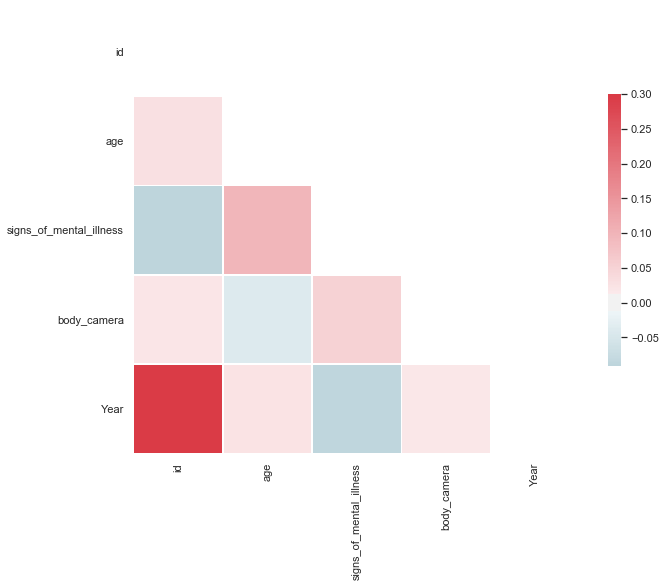

In [57]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

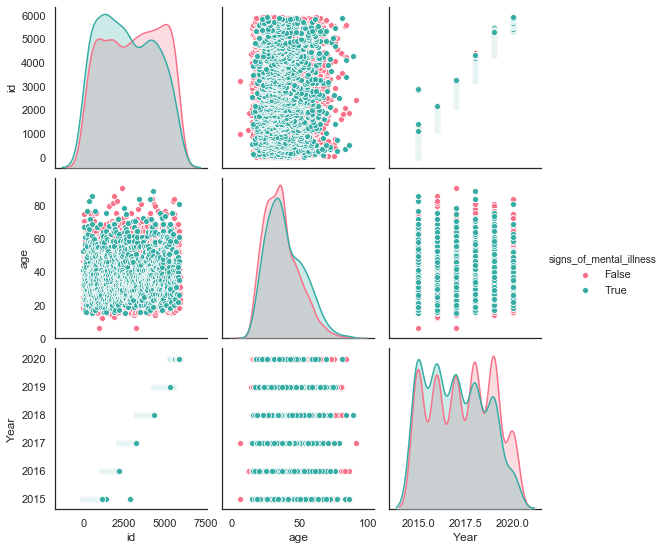

In [58]:
sns.pairplot(data=df, hue='signs_of_mental_illness', 
             vars= ['id', 'age', 'Year'],
            palette='husl')

In [59]:
corr = df.corr()
corr.style.background_gradient(cmap='PuBu')

,id,age,signs_of_mental_illness,body_camera,Year
id,1.000000,0.029446,-0.091406,0.018759,0.982558
age,0.029446,1.000000,0.097526,-0.036376,0.026247
signs_of_mental_illness,-0.091406,0.097526,1.000000,0.053052,-0.087389
body_camera,0.018759,-0.036376,0.053052,1.000000,0.018457
Year,0.982558,0.026247,-0.087389,0.018457,1.000000
